## 基础概念和流程化代码块

In [1]:
import torch
import torchvision

In [11]:
# torch数据与numpy数据类型转换

import numpy as np
# 数组和一维张量
np_dat = np.arange(12).reshape(3,4) # 构造数据n维数组
tc_dat = torch.from_numpy(np_dat)   # ndarray 对象 torch.from_numpy(xx) 从numpy转换为tensor
tc2ar = tc_dat.numpy()              # tensor 对象 xx.numpy() 转换回数组
print(
    '\nnumpy data:\n',np_dat,
    '\n\ntorch data:\n',tc_dat,
    '\n\ntrs back data:\n',tc2ar
)
# 矩阵和二维张量
data = [[1,2],[3,4]]
data = np.array(data)               # 将数据转为np中的数组，本例可以不用转换
tensor = torch.FloatTensor(data)    # 将数据转换为32位浮点型张量
print(
    '\nnumpy matrix:\n', np.matmul(data, data),
    '\n\ntorch matrix:\n', torch.mm(tensor, tensor)
)


numpy data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

torch data:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) 

trs back data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

numpy matrix:
 [[ 7 10]
 [15 22]] 

torch matrix:
 tensor([[ 7., 10.],
        [15., 22.]])


In [18]:
# 学习Variable变量，nn中的所有参数都是Variable形式的

import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])   # 构造tensor
var = Variable(tensor, requires_grad=True)  # 放入Variable，记录梯度变化（默认为False）
print('原始数据：\n', var)

tsout = torch.mean(tensor*tensor)       # x^2
vrout = torch.mean(var*var)             # 计算会放入变量内部，且记录操作
print('普通张量运算：\n', tsout)
print('变量内张量运算：\n', vrout)

# 尝试反向传递
vrout.backward()
print('反向传递：\n', var.grad)

# 从Variable变量中取出数组，Variable的data属性
print('外部Tensor：\n', var.data)
print('Numpy形式：\n', var.data.numpy())

原始数据：
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
普通张量运算：
 tensor(7.5000)
变量内张量运算：
 tensor(7.5000, grad_fn=<MeanBackward0>)
反向传递：
 tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
外部Tensor：
 tensor([[1., 2.],
        [3., 4.]])
Numpy形式：
 [[1. 2.]
 [3. 4.]]


In [19]:
# 激活函数，对线性模型使用激活函数加入非线性特征
# 线性模型常表示为: y = Wx
# 加入激活函数表示为: y = AF(Wx)        # AF, 即 ActivationFunction 激活函数
# 常见的AF函数有：relu, sigmoid, tanh, softmax/softplus

# AF函数的选择：
# 少量层结构的nn中，cnn使用relu，rnn使用relu/tanh均可

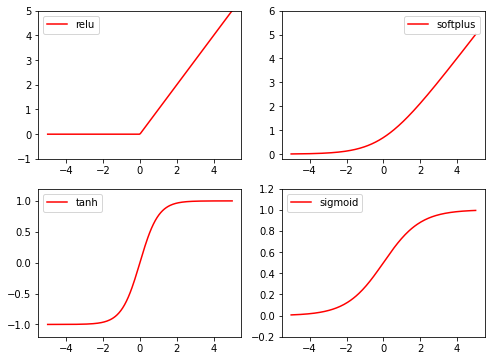

In [21]:
# 激活函数

import torch 
import torch.nn.functional as func 
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 构造数据
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = func.relu(x).data.numpy()
y_softplus = func.softplus(x).data.numpy()  # softmax用于计算概率不能做线图，换为softplus
y_tanh = func.tanh(x).data.numpy()
y_sigmoid = func.sigmoid(x).data.numpy()

plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='r', label='relu')
plt.ylim(-1,5)
plt.legend(loc='best')
plt.subplot(222)
plt.plot(x_np, y_softplus, c='r', label='softplus')
plt.ylim(-0.2,6)
plt.legend(loc='best')
plt.subplot(223)
plt.plot(x_np, y_tanh, c='r', label='tanh')
plt.ylim(-1.2,1.2)
plt.legend(loc='best')
plt.subplot(224)
plt.plot(x_np, y_sigmoid, c='r', label='sigmoid')
plt.ylim(-0.2,1.2)
plt.legend(loc='best')

In [37]:
# 回归问题-散点图回归

import torch
from torch.autograd import Variable
import torch.nn.functional as func 
import matplotlib.pyplot as plt 

# 生成随机数据
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())     # 按二次函数构造，加入随机波动
# plt.scatter(x.data.numpy(), y.data.numpy()) # plt无法识别tensor，要`.data.numpy()`转为数组
x,y = Variable(x),Variable(y)               # x,y 需要转为变量才能被 NN 正确识别

# 定义神经网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):      # 定义网络层的信息
        super(Net,self).__init__()          # 超类，继承Net属性，初始化
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # 自定义隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 定义输出层（预测函数）
    def forward(self, x):                   # 前向传递整合各层
        x = func.relu(self.hidden(x))       # 用hidden layer预处理x数据
        x = self.predict(x)                 # 执行预测函数
        return x

net = Net(1, 10, 1)     # 特征数1，隐藏层10，输出值1个（Net定义的三个属性）
# print(net)            # 查看图的结构（层信息）
# 优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)   # 用梯度下降优化param参数，指定学习率
loss_func = torch.nn.MSELoss()                          # 用均方差计算损失值-处理回归问题

# 可视化（动态监测）
# plt.ion()   # .i 交互式输出， on 打开

# 训练
for t in range(100):        # 训练100次
    prediction = net(x)     # 计算预测值
    loss = loss_func(prediction, y) # 计算损失值-误差（注意参数顺序）
    # 调用优化器
    optimizer.zero_grad()   # 参数的梯度归零
    loss.backward()         # 计算新的梯度，反向传递梯度
    optimizer.step()        # 以optimizer定义的优化器优化梯度

# 可视化（动态监测）-代码已修改好，VScode不支持动态显示，会输出系列图像
#     if t%5 ==0:
#         plt.cla()
#         plt.scatter(x.data.numpy(), y.data.numpy())
#         plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#         plt.text(-0.5, 1,'Loss=%.3f' % loss.data, fontdict={'size':20, 'color':'red'})
#         plt.pause(0.1)
# plt.ioff()  # .i 交互式输出， off 关闭

In [42]:
# 分类问题-两标签数据点分类

import torch
from torch.autograd import Variable
import torch.nn.functional as func 
import matplotlib.pyplot as plt 

# 生成随机数据
n_data = torch.ones(100,2)      # 总体数据是100*2维的
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)           # 标签是0
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)            # 标签是1
x = torch.cat((x0,x1), 0).type(torch.FloatTensor)   # 整合数据
y = torch.cat((y0,y1), ).type(torch.LongTensor)     # 整合标签(torch中一定是LongTensor格式)
x,y = Variable(x),Variable(y)
# plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(), s=100, lw=0)

# 定义神经网络【定义层，前向传递】
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):      # 定义网络层的信息
        super(Net,self).__init__()          # 超类，继承Net属性，初始化
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # 自定义隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 定义输出层（预测函数）
    def forward(self, x):                   # 前向传递整合各层
        x = func.relu(self.hidden(x))       # 用hidden layer预处理x数据
        x = self.predict(x)                 # 执行预测函数
        return x

net = Net(2, 10, 2)     # 特征数1，隐藏层10，输出值1个（Net定义的三个属性）
# print(net)            # 查看图的结构（层信息）
# 优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)   # 用梯度下降优化param参数，指定学习率
loss_func = torch.nn.CrossEntropyLoss()                 # 交叉熵损失计算损失，处理分类问题

# 可视化（动态监测）
# plt.ion()   # .i 交互式输出， on 打开

# 训练
for t in range(100):        # 训练100次
    out = net(x)     # 计算预测值
    loss = loss_func(out, y) # 计算损失值-误差（注意参数顺序）
    # 调用优化器
    optimizer.zero_grad()   # 上一轮参数的梯度归零
    loss.backward()         # 计算新的梯度，反向传递梯度
    optimizer.step()        # 以optimizer定义的优化器优化梯度

#可视化（动态监测）-代码已修改好，VScode不支持动态显示，会输出系列图像
#     if t%2 ==0:
#         plt.cla()
#         prediction = torch.max(func.softmax(out), 1)[1]
#         pred_y = prediction.data.numpy().squeeze()
#         target_y = y.data.numpy()
#         plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y,s=100,lw=0)
#         accuracy = sum(pred_y == target_y)/200
#         plt.text(-0.1, -4,'Accuracy=%.3f' % accuracy, fontdict={'size':20, 'color':'red'})
#         plt.pause(0.1)
# plt.ioff()  # .i 交互式输出， off 关闭

In [17]:
# 快速搭模型 - 类似keras的Sequential模块
# 使用上一次的二分类问题数据

import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt 

# 生成随机数据
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1), 0).type(torch.FloatTensor)
y = torch.cat((y0,y1), ).type(torch.LongTensor)     # 整合标签(torch中一定是LongTensor格式)
x,y = Variable(x),Variable(y)
# plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(), s=100, lw=0)

# 定义神经网络【Sequential搭积木方法，类似Keras.Sequential】
net = torch.nn.Sequential(
    torch.nn.Linear(2,10),      # 输入2，隐藏层10
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),      # 从上一层输入10，输出2
)
# print(net)
# 优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)   # 用梯度下降优化param参数，指定学习率
loss_func = torch.nn.CrossEntropyLoss()                 # 交叉熵损失计算损失，处理分类问题

# 可视化（动态监测）
# plt.ion()   # .i 交互式输出， on 打开

# 训练
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    # 调用优化器
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#可视化（动态监测）-代码已修改好，VScode不支持动态显示，会输出系列图像
#     if t%2 ==0:
#         plt.cla()
#         prediction = torch.max(func.softmax(out), 1)[1]
#         pred_y = prediction.data.numpy().squeeze()
#         target_y = y.data.numpy()
#         plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y,s=100,lw=0)
#         accuracy = sum(pred_y == target_y)/200
#         plt.text(-0.1, -4,'Accuracy=%.3f' % accuracy, fontdict={'size':20, 'color':'red'})
#         plt.pause(0.1)
# plt.ioff()  # .i 交互式输出， off 关闭

In [6]:
# 神经网络模型的保存和载入
# torch.save(), torch.load(), net_new.load_state_dict(torch.load())
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt 

# 生成随机数据
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
# plt.scatter(x.data.numpy(), y.data.numpy()) # plt无法识别tensor，要`.data.numpy()`转为数组
x,y = Variable(x),Variable(y)

# 定义神经网络【Sequential】
# 保存模型
def save():
    net = torch.nn.Sequential(  # 定义
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):        # 训练
        prediction = net(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    torch.save(net, 'net.pkl')  # 保存
    torch.save(net.state_dict(), 'net_params.pkl')  # 保存参数

    # net 可视化部分
    # plt.figure(1,figsize=(10,3))
    # plt.subplot(131)
    # plt.title('net')
    # plt.scatter(x.data.numpy(), y.data.numpy())
    # plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    # plt.show()

# 加载模型
def restore_net():
    net_rs = torch.load('net.pkl')

    # prediction = net_rs(x)
    # net_rs 可视化部分
    # plt.subplot(132)
    # plt.title('net_rs')
    # plt.scatter(x.data.numpy(), y.data.numpy())
    # plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

# 加载模型参数
def restore_params():
    net_rs_par = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    net_rs_par.load_state_dict(torch.load('net_params.pkl'))
    # .load_state_dict()读取模型参数，参数需要用torch.load()从旧模型中提取
    
    # prediction = net_rs_par(x)
    # net_rs_par 可视化部分
    # plt.subplot(133)
    # plt.title('net_rs_par')
    # plt.scatter(x.data.numpy(), y.data.numpy())
    # plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [16]:
# 批训练
# 借助加载器torch.utils.data.DataLoader()

import torch
import torch.utils.data as Data 

BATCH_SIZE = 5  # 一个小批次有5个数据
# 构造数据
x = torch.linspace(1,10,10)     # x tensor
y = torch.linspace(10,1,10)     # y tensor

torch_dataset = Data.TensorDataset(x,y)     # 整合数据，“莫烦教程”中的参数标签已弃用
loader = Data.DataLoader(
    dataset=torch_dataset,      # 加载数据
    batch_size=BATCH_SIZE,      # 加载batch大小
    shuffle=True,               # 是否随机打乱batch后抽样
    num_workers=2,              # 2个进程
)

for epoch in range(3):          # 重复训练3次
    for step,(batch_x, batch_y) in enumerate(loader):
        # training ...
        print('Epoch:',epoch,'|Step:',step,'|Batch x:',batch_x.numpy(),'|batch_y:',batch_y.numpy())

Epoch: 0 |Step: 0 |Batch x: [10.  5.  9.  7.  2.] |batch_y: [1. 6. 2. 4. 9.]
Epoch: 0 |Step: 1 |Batch x: [6. 8. 1. 4. 3.] |batch_y: [ 5.  3. 10.  7.  8.]
Epoch: 1 |Step: 0 |Batch x: [10.  5.  4.  2.  9.] |batch_y: [1. 6. 7. 9. 2.]
Epoch: 1 |Step: 1 |Batch x: [6. 1. 7. 3. 8.] |batch_y: [ 5. 10.  4.  8.  3.]
Epoch: 2 |Step: 0 |Batch x: [10.  4.  5.  8.  6.] |batch_y: [1. 7. 6. 3. 5.]
Epoch: 2 |Step: 1 |Batch x: [2. 3. 1. 7. 9.] |batch_y: [ 9.  8. 10.  4.  2.]


0
1
2
3
4
5
6
7
8
9
10
11


(0.0, 0.2)

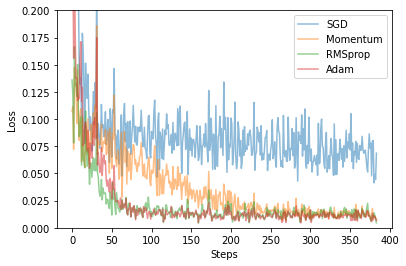

In [17]:
# 优化器
# torch.optim.SGD, .SGD(momentum=0.8), .RMSprop, .Adam

import torch
import torch.utils.data as Data 
import torch.nn.functional as func 
from torch.autograd import Variable
import matplotlib.pyplot as plt 

# 定义超参数
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# 构造数据
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
# plt.scatter(x.numpy(), y.numpy())
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

# 搭建网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self,x):
        x = func.relu(self.hidden(x))
        x = self.predict(x)
        return x
# 本例需要搭建使用不同优化器的网络，此处先用上述网络初始化
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]
# 分别使用不同优化器
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
# 损失函数和记录
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]

# 训练循环
for epoch in range(EPOCH):  # 每个epoch批的操作
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)     # 变量化
        b_y = Variable(batch_y)
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)               # 输出
            loss = loss_func(output, b_y)   # 损失
            opt.zero_grad()                 # 清除原梯度
            loss.backward()                 # 反向传播计算梯度
            opt.step()                      # 应用梯度（修改参数）
            # l_his.append(loss.data[0])    # 记录损失-旧方法
            # l_his.append(loss.item())     # 版本更新，新方法
            l_his.append(loss.data)         # 版本更新，新方法

# 可视化
labels = ['SGD','Momentum','RMSprop','Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i], alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim(0,0.2)

## 神经网络模型搭建

In [5]:
# CNN 卷积神经网络  - 图像分析
# MNist手写数字识别数据集

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt 

# 定义超参数
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False       # 下载完成后改为False

# 数据下载
# 训练集
train_data = torchvision.datasets.MNIST(
    root='./mnist',     # 下载到本地目录/本地数据目录
    train=True,         # 训练集数据
    transform=torchvision.transforms.ToTensor(),    # 将(0,255)的灰度压缩到(0,1)之间
    download=DOWNLOAD_MNIST,
)
# 测试性查看（图像数据）
# print(train_data.train_data.size())
# print(train_data.train_labels.size())
# plt.imshow(train_data.train_data[0].numpy(),cmap='gray')  # cmap使用灰度图## 
# 【[]0siggogougou'jgou'jigou'jiagou'jian构建构建ss数据加载器（带参数）
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
# 测试集
test_data = torchvision.datasets.MNIST(root='./mnist/',train=False) # 非训练集
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.     # 取数据，展平，转变量；转格式；压缩为(0,1)间的数
test_y = test_data.test_labels[:2000]       # 标签，即预测目标的真实对照

# 卷积神经网络
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()     # 超类初始化
        self.conv1 = nn.Sequential(     # 搭建卷积层
            nn.Conv2d(      # 卷积运算(输入1层，输出16层)(1,28,28)
                in_channels=1,  # 输入的层（灰度图1层数据，RGB彩图3层数据）
                out_channels=16,# 输出的高度（每个卷积核输出16个特征值）
                kernel_size=5,  # 卷积核长宽是5*5
                stride=1,       # 每次卷积后跳过几个像素继续卷积
                padding=2,      # 卷积后边缘会缩小，padding在边缘加0，使图片大小不变(16,28,28)
                                # padding = (kernel_size - 1) / 2 = (5-1)/2 = 2
            ),
            nn.ReLU(),      # 非线性化
            nn.MaxPool2d(   # 池化(16,14,14)
                kernel_size=2   # 用长宽是2*2的盒子，取范围内最大值作为特征值（类似马赛克）
            ),
        )
        self.conv2 = nn.Sequential(     # (16,14,14)
            nn.Conv2d(16, 32, 5, 1, 2), # 输入16层，输出32层，卷积核5，跳过1像素，边缘补2像素(32,14,14)
            nn.ReLU(),
            nn.MaxPool2d(2)             # (32,7,7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)    # 输入是上述尺寸，
    def forward(self, x):       # 调用上面定义的方法
        x = self.conv1(x)       # 用self.conv1方法卷积
        x = self.conv2(x)       # 用self.conv2方法卷积(batch , 32, 7, 7)
        x = x.view(x.size(0), -1)   # 展平操作，x.size(0)保留batch维度，
                                    # -1 推导另一维度（整合剩下的维度）(batch , 32 * 7 * 7)
        output = self.out(x)    # 用self.out方法接收展平的图像数据，计算输出
        return output
# 创建cnn对象
cnn = CNN()
# print(cnn)
# 优化器
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

# 训练
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x = Variable(x)               # 变量化
        b_y = Variable(y)
        # 计算和反向传递
        output = cnn(b_x)               # cnn计算输出
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 每50步查看训练效果（准确度）
        if step % 50 == 0 :
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # accuracy = sum(pred_y == test_y)/test_y.size(0)   # /的除法在torch1.6中不支持了
            accuracy = torch.true_divide(sum(pred_y == test_y), test_y.size(0))
            print('Epoch:',epoch,'|train loss: %.4f' % loss.data, '|test accuracy: %.4f' % accuracy)

# 测试
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y,'prediction number')
print(test_y[:10].numpy(),'real number')

Epoch: 0 |train loss: 2.3038 |test accuracy: 0.0985
Epoch: 0 |train loss: 0.5570 |test accuracy: 0.8425
Epoch: 0 |train loss: 0.3323 |test accuracy: 0.8985
Epoch: 0 |train loss: 0.3281 |test accuracy: 0.9225
Epoch: 0 |train loss: 0.1436 |test accuracy: 0.9225
Epoch: 0 |train loss: 0.1761 |test accuracy: 0.9340
Epoch: 0 |train loss: 0.0869 |test accuracy: 0.9460
Epoch: 0 |train loss: 0.1603 |test accuracy: 0.9565
Epoch: 0 |train loss: 0.0926 |test accuracy: 0.9610
Epoch: 0 |train loss: 0.0987 |test accuracy: 0.9580
Epoch: 0 |train loss: 0.0604 |test accuracy: 0.9645
Epoch: 0 |train loss: 0.0196 |test accuracy: 0.9625
Epoch: 0 |train loss: 0.0283 |test accuracy: 0.9660
Epoch: 0 |train loss: 0.0241 |test accuracy: 0.9660
Epoch: 0 |train loss: 0.0938 |test accuracy: 0.9725
Epoch: 0 |train loss: 0.2410 |test accuracy: 0.9670
Epoch: 0 |train loss: 0.1512 |test accuracy: 0.9750
Epoch: 0 |train loss: 0.1680 |test accuracy: 0.9730
Epoch: 0 |train loss: 0.2292 |test accuracy: 0.9740
Epoch: 0 |tr

In [6]:
# RNN 循环神经网络 - 分类问题 - MNist手写数字识别数据集
# RNN 用于处理序列化数据（语音/文字）

import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as datasets     # 数据集加载
import torchvision.transforms as transforms # 变换
import matplotlib.pyplot as plt

# 超参数
EPOCH = 1
BATCH_SIZE = 64
TIME_STEP = 28      # 多少时间点的数据，图像28行
INPUT_SIZE = 28     # 每个点多少数据，图像宽28
LR = 0.01
DOWNLOAD_MNIST = False

# 数据集
train_data = datasets.MNIST(root='./mnist/',train=True,transform=transforms.ToTensor(),download=DOWNLOAD_MNIST)     # 训练集
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_data = datasets.MNIST(root='./mnist/',train=False,transform=transforms.ToTensor())# 非训练集
test_x = torch.true_divide(Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000], 255)    # 取数据，展平，转变量；转格式；压缩为(0,1)间的数
test_y = test_data.test_labels.numpy().squeeze()[:2000] # 标签，即预测目标的真实对照
# / 除法在训练以外的位置是否可用，还不知，测试后决定用哪种形式
# test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.     

# 循环神经网络
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn = nn.LSTM(     # 本例用RNN处理图像 nn.RNN 不太收敛，用 nn.LSTM
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,       # 计算时长较短，层数越大准确度越高
            batch_first=True,   # (batch, time_step, input) batch放在第一位这么定义
        )
        self.out = nn.Linear(64, 10)
    def forward(self, x):
        r_out,(h_n, h_c) = self.rnn(x, None)    # x的shape (batch, time_step, input_size)
                                        # batch个数据，每个time_step行读取，每行input_size个数
                                        # 每次循环接收新的input和上一次的hidden_status计算输出
                                        # None 指第一个输入没有hidden_status
        out = self.out(r_out[:,-1,:])   # 选最后一个时刻的输出状态
        return out
rnn = RNN()
print(rnn)

# 优化器、损失函数
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

# 训练
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x.view(-1,28,28))
        b_y = Variable(y)
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 每50步查看训练效果（准确度）
        if step % 50 == 0 :
            test_output = rnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            # accuracy = sum(pred_y == test_y)/test_y.size(0)   # /的除法在torch1.6中不支持了
            accuracy = torch.true_divide(sum(pred_y == test_y), test_y.size)
            print('Epoch:',epoch,'|train loss: %.4f' % loss.data, '|test accuracy: %.4f' % accuracy)

# 测试
test_output = rnn(test_x[:10].view(-1,28,28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y,'prediction number')
print(test_y[:10],'real number')

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch: 0 |train loss: 2.3065 |test accuracy: 0.1125
Epoch: 0 |train loss: 1.2413 |test accuracy: 0.5975
Epoch: 0 |train loss: 0.8979 |test accuracy: 0.7170
Epoch: 0 |train loss: 0.4667 |test accuracy: 0.8435
Epoch: 0 |train loss: 0.3610 |test accuracy: 0.8555
Epoch: 0 |train loss: 0.2638 |test accuracy: 0.9190
Epoch: 0 |train loss: 0.4281 |test accuracy: 0.9210
Epoch: 0 |train loss: 0.5153 |test accuracy: 0.8930
Epoch: 0 |train loss: 0.3368 |test accuracy: 0.9145
Epoch: 0 |train loss: 0.1160 |test accuracy: 0.9505
Epoch: 0 |train loss: 0.0695 |test accuracy: 0.9345
Epoch: 0 |train loss: 0.1573 |test accuracy: 0.9455
Epoch: 0 |train loss: 0.1175 |test accuracy: 0.9565
Epoch: 0 |train loss: 0.1632 |test accuracy: 0.9550
Epoch: 0 |train loss: 0.1216 |test accuracy: 0.9525
Epoch: 0 |train loss: 0.1343 |test accuracy: 0.9430
Epoch: 0 |train loss: 0.0665 |test accuracy: 0.9580
Epoch: 0 

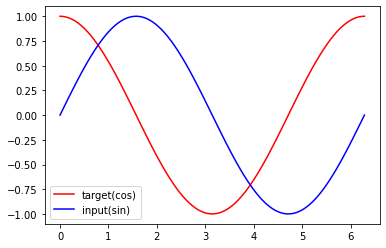

In [9]:
# RNN 循环神经网络 - 回归问题
# VScode 不支持交互式绘图，本例参考RNN搭建和训练代码即可

import torch
from torch import nn
from torch.autograd import Variable
import numpy as np 
import matplotlib.pyplot as plt 
torch.manual_seed(1)    # 指定随机种子增加重现性

# 超参数
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02

# 构造数据
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target(cos)')
plt.plot(steps, x_np, 'b-', label='input(sin)')
plt.legend(loc='best')

# 循环神经网络
class RNN(nn.Module):
    def __init__(self):                 # 初始化，定义方法
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,      # 1个数据点
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(32,1)
    def forward(self, x, h_state):      # 调用网络执行的方法
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step, :]))
        return torch.stack(outs, dim=1), h_state
rnn = RNN()
print(rnn)

# 优化器、损失函数
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

h_state = None      # 预设第一次传入的隐藏状态（没有之前数据）

plt.figure(1, figsize=(12, 5))
plt.ion()           # i 交互绘图 on 打开

# 训练
for steps in range(100):
    start,end = step * np.pi, (step + 1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data)        # 状态重新包装，等待下次传入

    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 可视化
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()           # i 交互绘图 off 关闭

torch.Size([60000, 28, 28])
torch.Size([60000])


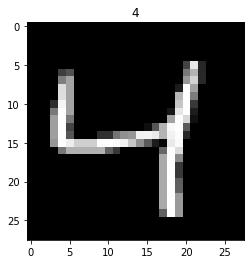

Epoch:  0 | train loss: 0.2333


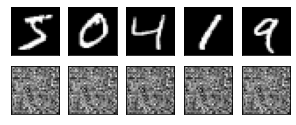

Epoch:  0 | train loss: 0.0697


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0668


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0711


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0685


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0666


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0617


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0659


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0574


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0590


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0496


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0585


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0572


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0504


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0461


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0454


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0458


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0515


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0445


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0429


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0435


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0383


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0391


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0411


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0418


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0416


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0368


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0381


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0389


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0401


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0422


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0384


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0470


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0382


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0380


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0389


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0332


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0406


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0408


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0341


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0397


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0384


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0356


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0340


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0341


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0368


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0365


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0395


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0333


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0347


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0325


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0363


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0399


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0376


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0411


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0399


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0415


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0382


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

In [11]:
# AutoEncode 自编码网络
# 普通RNN存在梯度消失(*w小于零，传到t1时可能接近于0)或梯度爆炸(*w大于零，传到t1时可能接近于无穷大)的可能

import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
torch.manual_seed(1)

# 超参数
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

# MNIST数据集
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST,)
# 可视化个例
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()
# 数据加载器
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 自编码/解码器
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(   # 编码器
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # 输出为3维/特征，以便可以用3D空间可视化
        )
        self.decoder = nn.Sequential(   # 解码器
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )
    def forward(self, x):       # 调用上述方法执行自编码神经网络
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
# 实例化
autoencoder = AutoEncoder()

# 优化器、损失函数
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# 初始化画布
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()       # 实时交互式训练

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

# 训练
for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)
        encoded, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
        # 阶段性输出训练状态
        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)
plt.ioff()
plt.show()

# 3D 视图可视化
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

## Pytorch 官方代码参考 - 搭建思路、模块、方法

In [ ]:
# Neural Networks 神经网络搭建

# 典型的训练过程如下：
# 1. 定义具有可学习参数/权重的神经网络
# 2. 遍历输入数据集
# 3. 通过网络处理输入
# 4. 计算损失（输出与真值的差距）
# 5. 将梯度传回网络的参数
# 6. 使用简单的更新规则来更新网络的权重：权重 = 权重 - 学习率 * 梯度

import torch
import torch.nn as nn
import torch.nn.functional as F

# 搭建网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)         # 输入1图像层，输出6个值，卷积核3
        self.conv2 = nn.Conv2d(6, 16, 3)        # 接收6输入，输入16值，卷积核3
        self.fc1 = nn.Linear(16 * 6 * 6, 120)   # 接收6*6图像和16输入，输出120
        self.fc2 = nn.Linear(120, 84)           # in:120, out:84
        self.fc3 = nn.Linear(84, 10)            # in:84, out:10
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # conv1卷积，relu处理，用2*2盒子池化
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)      # conv2卷积，relu处理，用2池化
        x = x.view(-1, self.num_flat_features(x))       # .view展平数据，-1维度通过后者推导
        x = F.relu(self.fc1(x)) # fc1线性处理，relu非线性化
        x = F.relu(self.fc2(x))
        x = self.fc3(x)         # fc3线性处理
        return x
    def num_flat_features(self, x):             # 计算展平特征数量
        size = x.size()[1:]     # 将输入（除了[0]，即batch信息）作为size
        num_features = 1        # 输出1，即最终要展平成1维数据
        for s in size:          # ？？？
            num_features *= s
        return num_features
net = Net()
print('网络结构：\n', net)

# 模型的可学习参数
params = list(net.parameters()) # 列出可学习参数
print('参数数量：\n', len(params))
print('参数尺寸：\n', params[0].size())  # conv1's .weight

input = torch.randn(1, 1, 32, 32)
out = net(input)
print('预测输出：\n', out)

# 将所有参数的梯度缓冲区归零
net.zero_grad()                 # 梯度归零
out.backward(torch.randn(1, 10))# 以随机梯度反向传播

# 损失函数
output = net(input)         # 计算输出
target = torch.randn(10)
target = target.view(1, -1) # 借助-1推导的方式，将目标转为和输出相同的维度
criterion = nn.MSELoss()    # 评估方式，采用“MSE均方差”的方式

loss = criterion(output, target)    # 损失函数，以MSE计算输入，输出同维结果作为损失标签
print('损失值：\n', loss)

# 计算图
# input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
#       -> view -> linear -> relu -> linear -> relu -> linear
#       -> MSELoss
#       -> loss

# 反向传播计算图的记录
print('损失函数求导：\n', loss.grad_fn)  # MSELoss
print('前一函数求导：\n', loss.grad_fn.next_functions[0][0])  # Linear
print('前一函数求导：\n', loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# 反向传播
net.zero_grad()     # 梯度归零
print('反向传播前偏置求导：\n', net.conv1.bias.grad)
loss.backward()     # 反向传播
print('反向传播后偏置求导：\n', net.conv1.bias.grad)

# 更新权重 - 最简单的更新规则就是随机梯度下降
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

import torch.optim as optim
# 优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()           # 梯度归零
output = net(input)             # 调用net网络
loss = criterion(output, target)# 调用损失函数
loss.backward()                 # 反向传播
optimizer.step()                # 优化

In [ ]:
# Pytorch 官方示例学习 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id18

# Pytorch Tensor 张量
import torch
dtype = torch.float                 # 数据类型
device = torch.device("cpu")        # 计算设备
# device = torch.device("cuda:0")   # 用GPU计算
# N batch 大小，输入维度，隐藏维度，输出维度
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device, dtype=dtype)    # 设备上创建随机输入和输出
y = torch.randn(N, D_out, device=device, dtype=dtype)
w1 = torch.randn(D_in, H, device=device, dtype=dtype)   # 随机初始化权重
w2 = torch.randn(H, D_out, device=device, dtype=dtype)
learning_rate = 1e-6                # 学习率
for t in range(500):
    # 前向传播，计算y的预测值
    h = x.mm(w1)
    h_relu = h.clamp(min=0)     # torch.clamp(input, min, max) 将数据截断到区间内
                                # 小于min的按min计算，大于max的按max计算
    y_pred = h_relu.mm(w2)
    # 与真实值比较，计算损失/误差
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    # 将损失值反向传播计算参数的梯度 - 【手动实现反向传播】
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    # 更新权重/参数
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

# AutoGrad 自动求导/求梯度 ############### 较上例更简洁
import torch
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")   # 使用GPU
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
learning_rate = 1e-6
for t in range(500):
    # 计算y的预测值
    y_pred = x.mm(w1).clamp(min=0).mm(w2)       # torch.clamp(input, min, max) 将数据截断到区间内
                                                # 小于min的按min计算，大于max的按max计算
    # 计算损失/误差
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    # 反向传播【自动跟踪】
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        # 结尾（或下次开始前）将参数梯度归零
        w1.grad.zero_()
        w2.grad.zero_()

# 自定义 AutoGrad 函数
# autograd函数本质上是两个作用于张量的函数，
# 前向函数从输入计算输出，
# 反向函数接收输出对于Loss的梯度，并计算输入对于该Loss的梯度。
class MyReLU(torch.autograd.Function):  # autograd.Function 创建其子类，即新的函数
    @staticmethod               # 静态方法创建前向函数
    def forward(ctx, input):            # ctx 是上下文对象，可为反向计算存储信息
        ctx.save_for_backward(input)    # 根据输入张量，计算输出张量，存入 ctx 对象
        return input.clamp(min=0)       # torch.clamp(input, min, max) 将数据截断到区间内
                                        # 小于min的按min计算，大于max的按max计算
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors      # 从 ctx 接收输出对于Loss的梯度
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0       # 计算输入张量对于Loss的梯度
        return grad_input
    # 后续计算时，在for循环内，首先引入新的autograd函数
    # relu = MyReLU.apply
    # 在计算y预测值时调用即可
    # y_pred = relu(x.mm(w1)).mm(w2)

# nn Module 神经网络模块 ################# 较上例更简洁
# 原始的 autograd 对大规模神经网络而言太过低级（操作复杂）
# tensorflow 中 keras, tensorflow-slim 等提供了高级的 autograd 抽象
# pytorch 中 nn 提供相同的作用，定义了大量的网络层、损失函数
import torch
N, D_in, H, D_out = 64, 1000, 100, 10       # 定义维度
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
model = torch.nn.Sequential(                # nn 模块的顺序模型
    torch.nn.Linear(D_in, H),               # 线性回归
    torch.nn.ReLU(),                        # 激活函数
    torch.nn.Linear(H, D_out),              # 线性回归
)
loss_fn = torch.nn.MSELoss(reduction='sum') # 损失函数
learning_rate = 1e-4    # 学习率
for t in range(500):    # 训练
    y_pred = model(x)           # 预测
    loss = loss_fn(y_pred, y)   # 计算损失
    if t % 100 == 99:
        print(t, loss.item())   # 打印进度
    model.zero_grad()           # 梯度归零
    loss.backward()             # 计算梯度
    with torch.no_grad():       # 更新参数 - 手动更新参数
        for param in model.parameters():
            param -= learning_rate * param.grad

# optim 优化器
# 前半部分，数据和模型搭建与上例相同
# learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # 选择优化器
# for t in range(500):
#     y_pred = model(x)
#     loss = loss_fn(y_pred, y)
#     if t % 100 == 99:
#         print(t, loss.item())
    optimizer.zero_grad()       # 对优化器梯度归零
    # loss.backward()
    optimizer.step()            # 调用优化器执行优化 - 优化器自动更新参数

# 自定义 nn Module 模块
import torch
class TwoLayerNet(torch.nn.Module):             # torch.nn.Module 创建子类，即新的网络
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H) # 线性
        self.linear2 = torch.nn.Linear(H, D_out)# 线性
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)   # 非线性 torch.clamp(input, min, max)将数据截断到区间
                                                # 小于min的按min计算，大于max的按max计算
        y_pred = self.linear2(h_relu)           # 预测
        return y_pred
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
model = TwoLayerNet(D_in, H, D_out)             # 调用新网络
criterion = torch.nn.MSELoss(reduction='sum')   # 损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 流程控制和Python一样，重用Layer共享相同的权重
import random
import torch
class DynamicNet(torch.nn.Module):                      # 创建动态网络
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)    # 线性
        self.middle_linear = torch.nn.Linear(H, H)      # 线性
        self.output_linear = torch.nn.Linear(H, D_out)  # 线性
    def forward(self, x):
        h_relu = self.input_linear(x).clamp(min=0)      # 非线性(以0为折点)
        for _ in range(random.randint(0, 3)):   # 借助for循环将隐含层重用4次
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)             # 预测
        return y_pred
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
model = DynamicNet(D_in, H, D_out)
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Pytorch 官方API介绍
# https://pytorch.org/docs/stable/index.html
# 简要总结主要的API的用途

# torch 
# 用于n维张量的判定、类型获取
# 创建、索引、切片、拆分、合并、生成、随机采样
# 对象读写、并行计算、数学计算、统计、比较
# 频谱变换、矩阵运算

##### torch.nn
# 容器(模块、顺序模型、参数列表)、卷积层(卷积、转置卷积)
# 池化层(最大池化、平均池化、功率平均池化、自适应最大池化、自适应平均池化)
# 填充层、非线性激活函数、归一化层(批量归一化、组归一化、实例归一化)
# 循环层(RNN, LSTM, GRU, RNNCell, ...)
# 迁移层(转换器、编码器、解码器、编码层、解码层)
# 线性层、降维层、稀疏层
# 距离函数、损失函数、视觉层、数据并行层(多GPU、分布式)
# 工具集(梯度操作、参数操作、剪枝、RNN层处理、多维数据展平)

##### torch.nn.functional
# https://pytorch.org/docs/stable/nn.functional.html
# 模型操作的具体介绍(用法、参数、举例)

# torch.autugrad - 自动微分

# torch.fft - 离散傅里叶变换和相关函数

# torch.backends - 后端相关的操作(后端设备检查、架构支持情况)

# torch.hub - 加载预训练模型
# torch.hub.list(github, force_reload=False) 列出可用模型
entrypoints = torch.hub.list('pytorch/vision', force_reload=True)
# torch.hub.help(github, model, force_reload=False) 显示字符串和示例
print(torch.hub.help('pytorch/vision', 'resnet18', force_reload=True))
# torch.hub.load(repo_or_dir, model, *args, **kwargs) 加载预训练模型
# from a github repo
repo = 'pytorch/vision'     # github目录直接写到参数里也可以
model = torch.hub.load(repo, 'resnet50', pretrained=True)
# from a local directory
path = '/some/local/path/pytorch/vision'
model = torch.hub.load(path, 'resnet50', pretrained=True)

# torch.optim - 优化器接口

# torch.utils.data - 数据加载器 DataLoader
# DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
#            batch_sampler=None, num_workers=0, collate_fn=None,
#            pin_memory=False, drop_last=False, timeout=0,
#            worker_init_fn=None, *, prefetch_factor=2,
#            persistent_workers=False)


##### torch.utils.tensorboard - 计算图可视化
# 将torch模型和指标记录下来，用tensorboard可视化。
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter   # 导入写入工具库
from torchvision import datasets, transforms
writer = SummaryWriter()    # 导入写入器 './runs/'
# 示例模型和数据
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
model = torchvision.models.resnet50(False)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
images, labels = next(iter(trainloader))
# 图写入部分
grid = torchvision.utils.make_grid(images)  # 定义网格
writer.add_image('images', grid, 0)         # 绘制网格
writer.add_graph(model, images)             # 将模型计算图写入images
writer.close()